# Dexplot

A Python library for making data visualizations.

The current aim of Dexplot is to make data visualization creation in Python more robust and straightforward. Dexplot is built on top of Matplotlib and accepts Pandas DataFrames as inputs. 

## Installation

`pip install dexplot`

## Goals

The primary goals for Dexplot are:

* Maintain a very consistent API with as few functions as necessary to make the desired statistical plots
* Allow the user to tweak the plots without digging into Matplotlib


## Tidy Data from Pandas
Dexplot only accepts Pandas DataFrames as input for its plotting functions that are in "tidy" form. 

## Sample plots
Dexplot currently maintains two primary functions, `aggplot` which is used to aggregate data and `jointplot`, which is used to plot raw values from two variables against each other. `heatmap` is another function available that produces just a single heatmap.

`aggplot` can create five different kinds of plots.

* `bar`
* `line`
* `box`
* `hist`
* `kde`

`jointplot` can create four different kinds of plots

* `scatter`
* `line`
* `2D kde`
* `bar`

There are 7 primary parameters to `aggplot`:

* `agg` - Name of column to be aggregated. If it is a column with string/categorical values, then the counts or relative frequency percentage will be returned.
* `groupby` - Name of column whose unique values will form independent groups. This is used in a similar fashion as the `group by` SQL clause.
* `data` - The Pandas DataFrame
* `hue` - The name of the column to further group the data within a single plot
* `row` - The name of the column who's unique values split the data in to separate rows
* `col` - The name of the column who's unique values split the data in to separate columns
* `kind` - The kind of plot to create. One of the five strings from above.

`jointplot` uses `x` and `y` instead of `groupby` and `agg`.

### City of Houston Data

To get started, we will use City of Houston employee data collected from the year 2016. It contains public information from about 1500 employees and is located in Dexplot's GitHub repository.

In [1]:
cd ..

/Users/Ted/Google Drive/Github Repos/PyCharmProjects/dexplot


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import dexplot as dxp

In [4]:
emp = pd.read_csv('notebooks/data/employee.csv')
emp.head()

,title,dept,salary,race,gender,experience,experience_level
0,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,1,Novice
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,34,Veteran
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,32,Veteran
3,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,4,Novice
4,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,3,Novice


### Plotting the average salary by department
The `agg` parameter is very important and is what will be aggregated (summarized by a single point statistic, like the mean or median). It is the first parameter and only parameter you must specify (besides `data`). If this column is numeric, then by default, the mean of it will be calculated. Here, we specify the `groupby` parameter, who's unique values form the independent groups and label the x-axis.

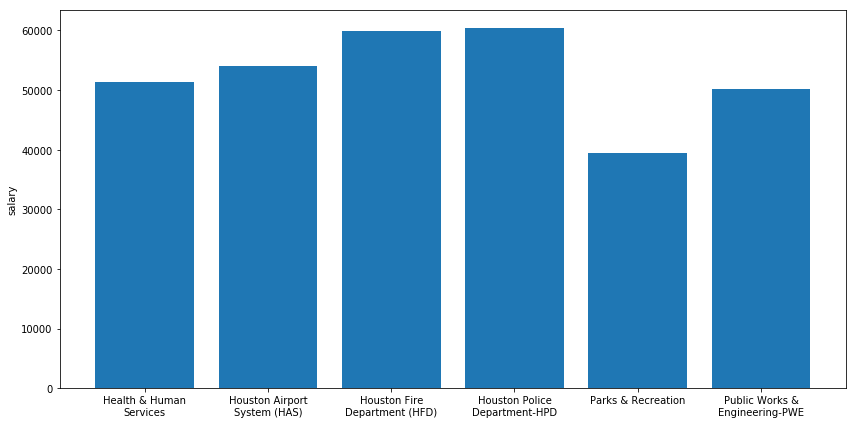

In [5]:
dxp.aggplot(agg='salary', groupby='dept', data=emp)

### Make horizontal with the `orient` parameter
The `orient` parameter controls whether the plot will be horizontal or vertical. By default it is set to `'h'`.

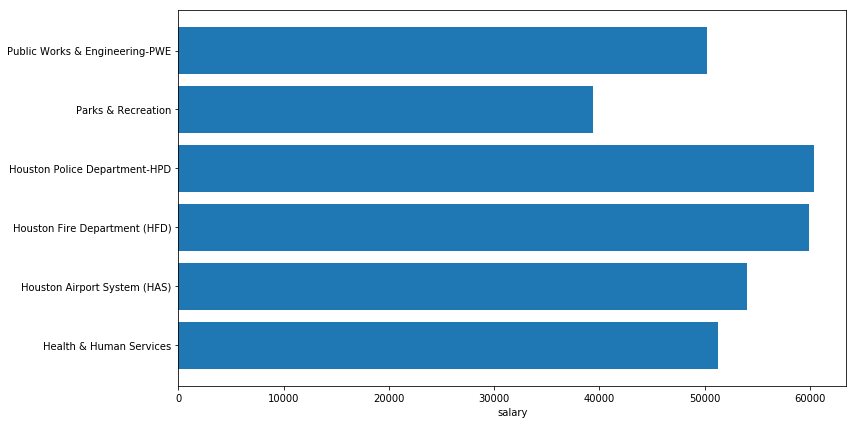

In [6]:
dxp.aggplot(agg='salary', groupby='dept', data=emp, orient='h')

### Controlling the figure size
One of the goals of Dexplot is to not have you dip down into the details of Matplotlib. We can use the `figsize` parameter to change the size of our plot.

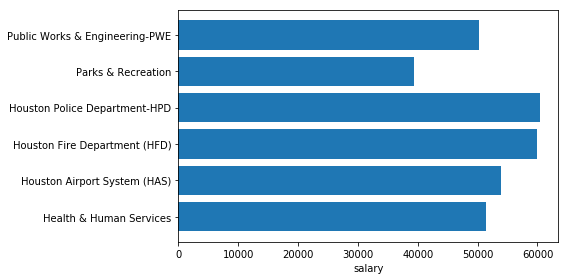

In [7]:
dxp.aggplot(agg='salary', groupby='dept', data=emp, orient='h', figsize=(8, 4))

### Adding another dimension with `hue`
The `hue` parameter may be used to further subdivide each unique value in the `groupby` column. Notice that long tick labels are automatically wrapped.

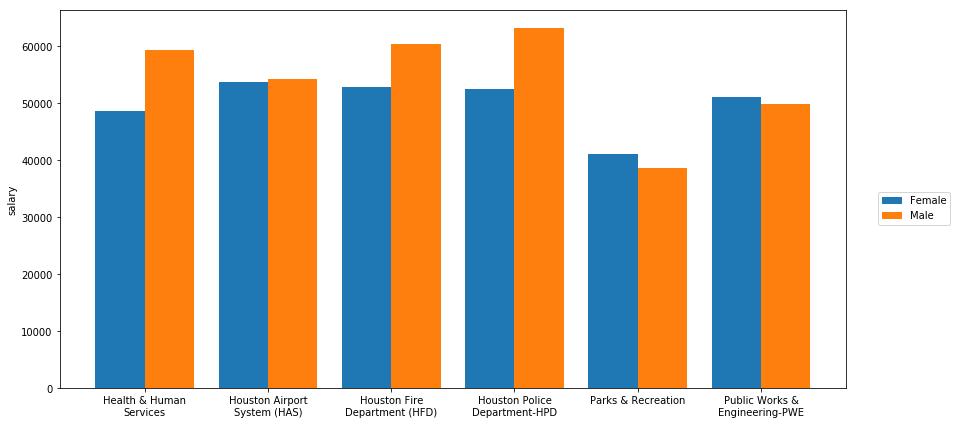

In [8]:
dxp.aggplot(agg='salary', groupby='dept', data=emp, hue='gender')

## Aggregating a String/Categorical column
It is possible to use a string/categorical column as the aggregating variable. In this instance, the counts of the unique values of that column will be returned. Because this is already doing a `groupby`, you cannot specify a `groupby` column in this instance. Let's get the count of employees by race.

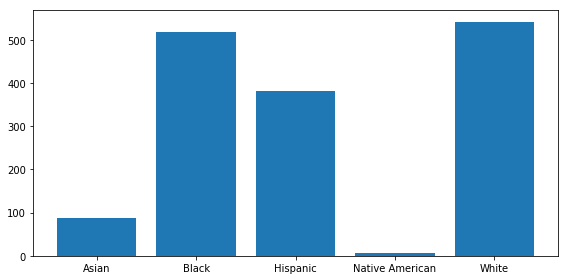

In [9]:
dxp.aggplot(agg='race', data=emp, figsize=(8, 4))

## Using `hue` with a String/Categorical column
Using a `groupby` is not allowed when a string/categorical column is being aggregated. But, we can still sub-divide the groups further by specifying `hue`.

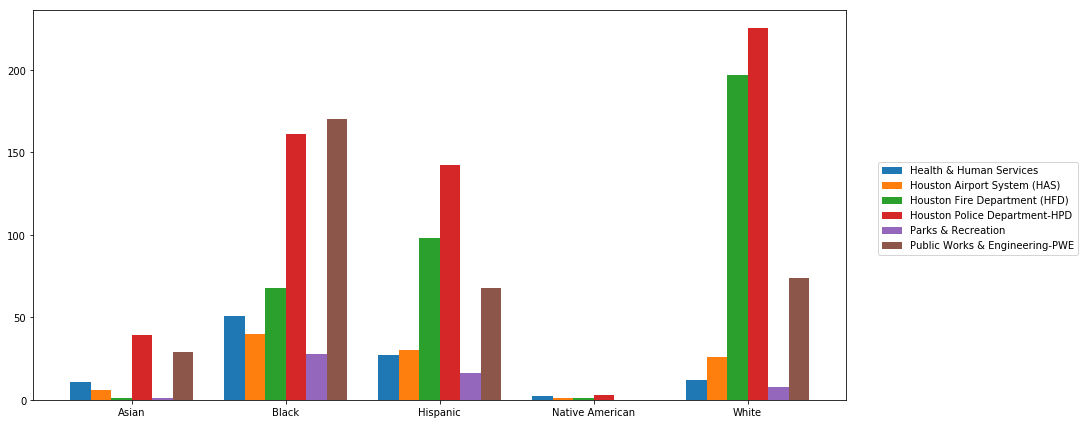

In [10]:
dxp.aggplot(agg='race', data=emp, hue='dept')

## Getting the relative frequency percentage with `normalize`
It is possible to turn the raw counts into percentages by passing a value to `normalize`. Let's find the percentage of all employees by race.

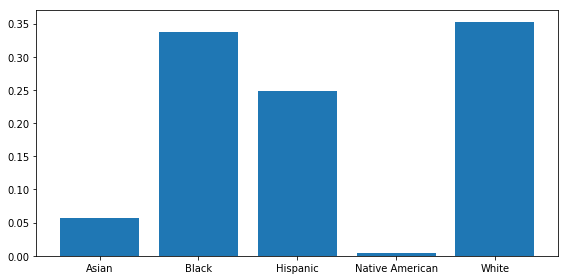

In [11]:
dxp.aggplot(agg='race', data=emp, normalize='all', figsize=(8, 4))

## You can normalize over any variable
The parameter `normalize` can be one of the values passed to the parameters `'agg'`, `'hue'`, `'row'`, `'col'`, or a tuple containing any number of these or `'all'`. For instance, in the following plot, you can normalize by either `race` or `dept`.

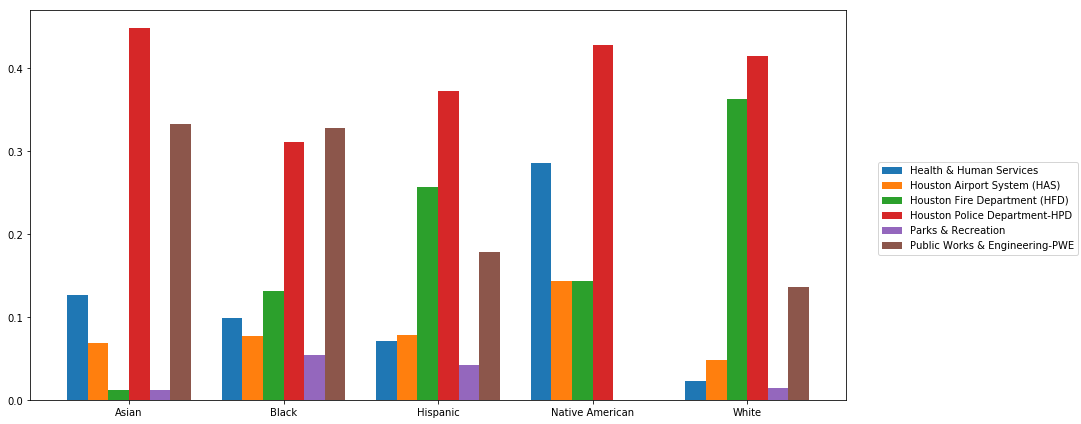

In [12]:
dxp.aggplot(agg='race', data=emp, hue='dept', normalize='race')

## Data normalized by race
As you can see, the data was normalized by race. For example, from the graph, we can tell that about 30% of black employees were members of the police department. We can also normalize by department. From the graph, about 10% of the Health & Human Services employees were Asian.

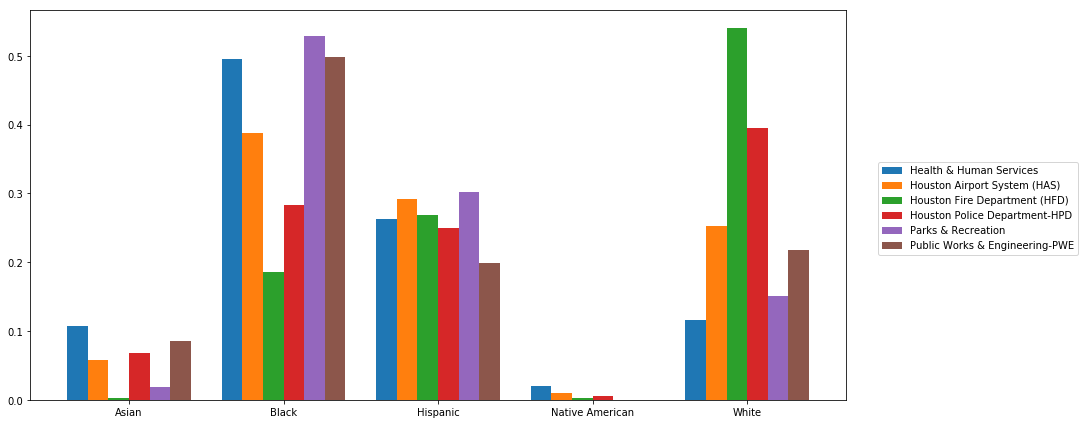

In [13]:
dxp.aggplot(agg='race', data=emp, hue='dept', normalize='dept')

## Stacked Bar Plots
All bar plots that have use the `hue` variable, can be stacked. Here, we stack the maximum salary by department grouped by race.

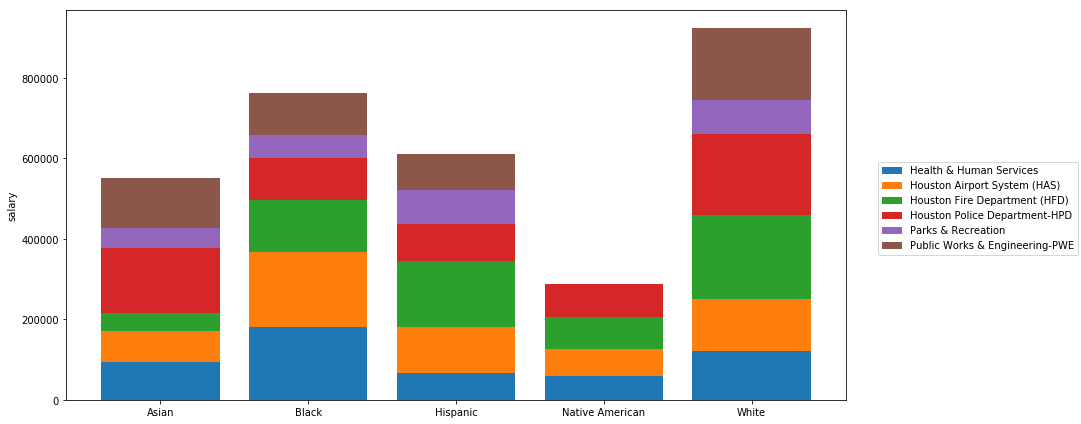

In [14]:
dxp.aggplot(agg='salary', data=emp, hue='dept', groupby='race', aggfunc='max', stacked=True)

## Stacking counts
The raw counts of each department by experience level are stacked here.

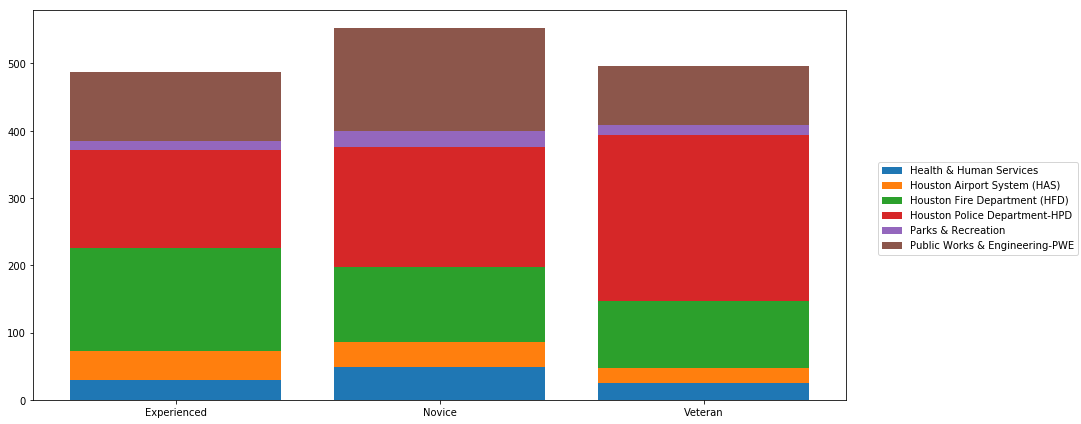

In [15]:
dxp.aggplot(agg='experience_level', data=emp, hue='dept', aggfunc='max', stacked=True)

## Stacking relative frequencies
The relative frequencies of each department by each race and experience level.

(<Figure size 864x720 with 5 Axes>,)

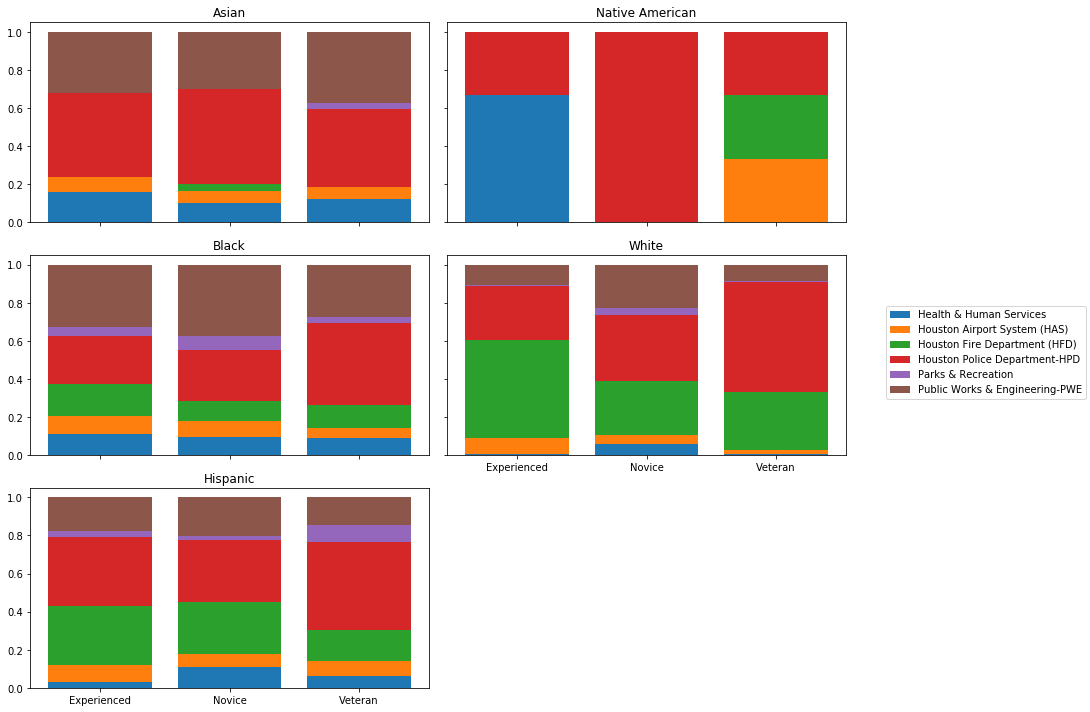

In [16]:
dxp.aggplot(agg='experience_level', data=emp, hue='dept', row='race', 
            normalize=('race', 'experience_level'), wrap=3, stacked=True)

# Other kinds of plots `line`, `box`, `hist`, and `kde`
`aggplot` is capable of making four other kinds of plots. The `line` plot is very similar to the bar plot but simply connects the values together. Let's go back to a numeric column and calculate the **median** salary by department across each gender.

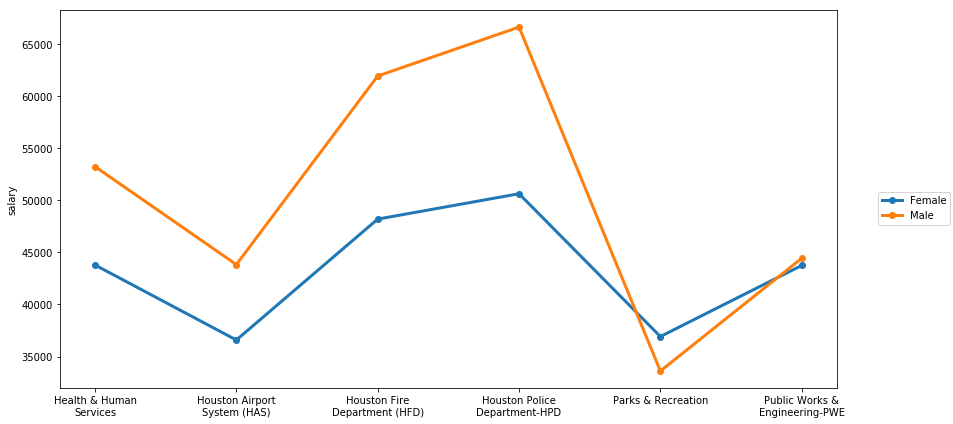

In [17]:
dxp.aggplot(agg='salary', data=emp, groupby='dept', hue='gender', kind='line', aggfunc='median')

## `aggfunc` can take any string value that Pandas can
There are more than a dozen string values that `aggfunc` can take. These are simply passed to Pandas `groupby` method which does the aggregation.

## All plots can be both vertical and horizontal
We can rotate all plots with `orient`. 

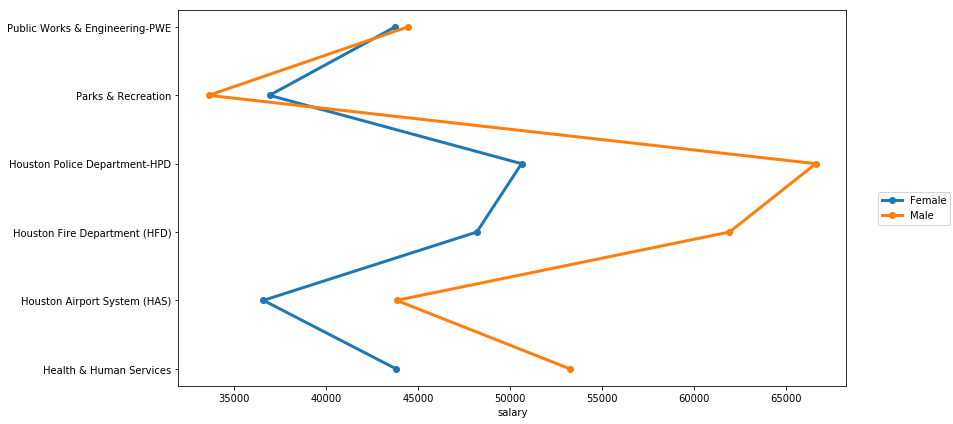

In [18]:
dxp.aggplot(agg='salary', data=emp, groupby='dept', hue='gender', kind='line', aggfunc='median', orient='h')

## Boxplots
Here is the same data plotted as a box plot. This isn't actually an aggregation, so the `aggfunc` parameter is meaningless here. Instead, all the values of the particular group are plotted.

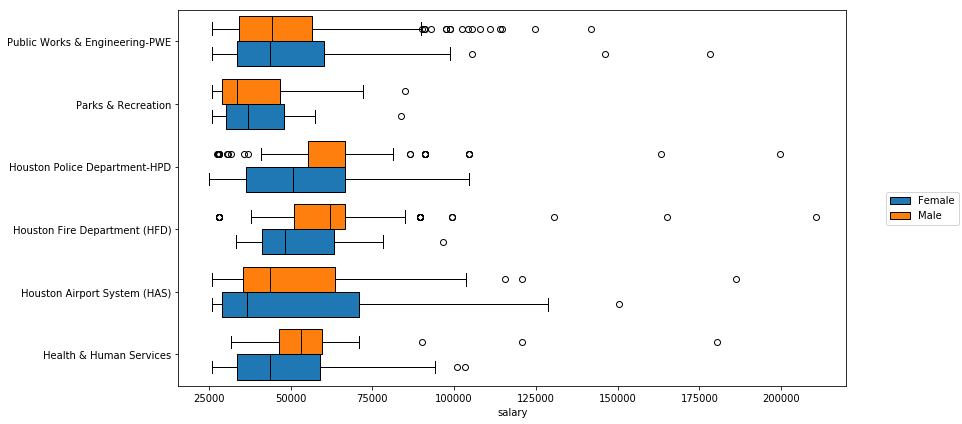

In [19]:
dxp.aggplot(agg='salary', data=emp, groupby='dept', hue='gender', kind='box', orient='h')

## Histograms and KDE's
As with boxplots, histograms and kdes do not function with `aggfunc` as they aren't aggregating but simply displaying all the data for us. Also, it is not possible to use both `groupby` and `agg` with these plots.

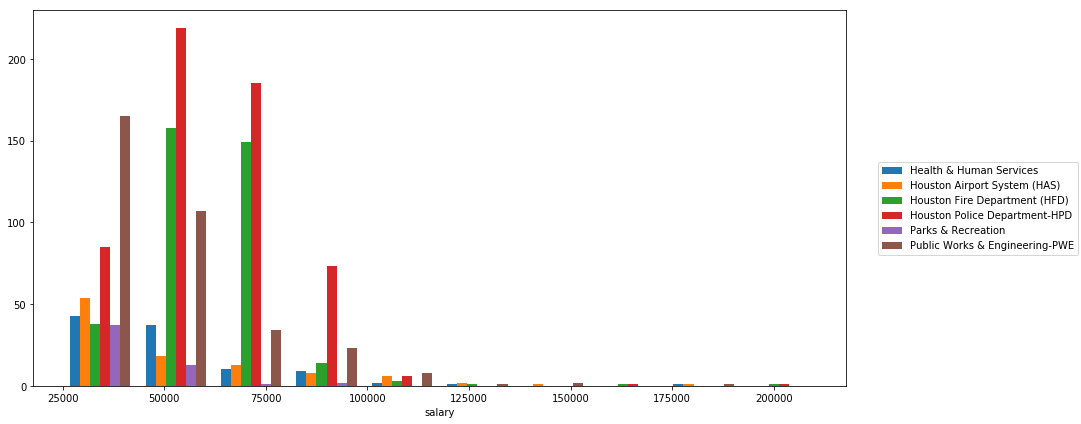

In [49]:
dxp.aggplot(agg='salary', data=emp, groupby='dept', kind='hist', orient='v')

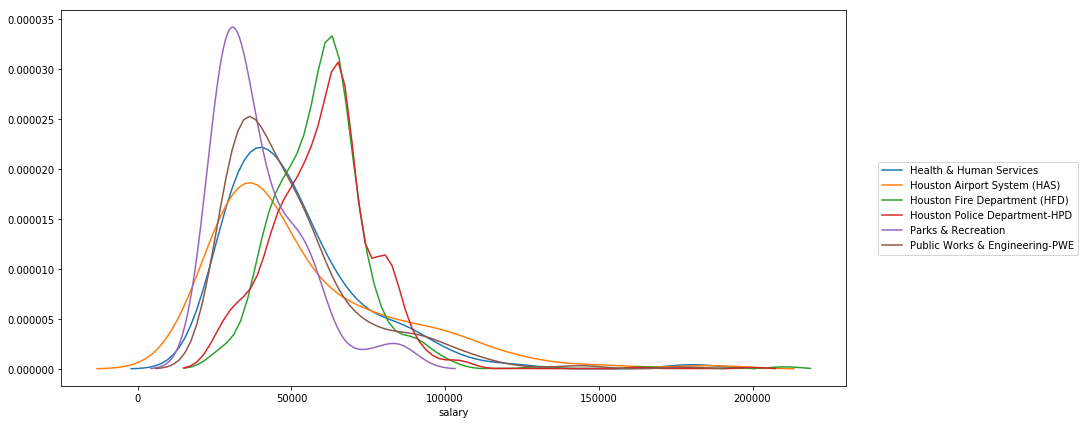

In [21]:
dxp.aggplot(agg='salary', data=emp, groupby='dept', kind='kde', orient='v')

## Splitting into separate plots
The `row` and `col` parameters can be used to split the data into separate plots. Each unique value of `row` or `col` will create a new plot. A one-item tuple consisting of the entire Figure is returned.

(<Figure size 720x1152 with 6 Axes>,)

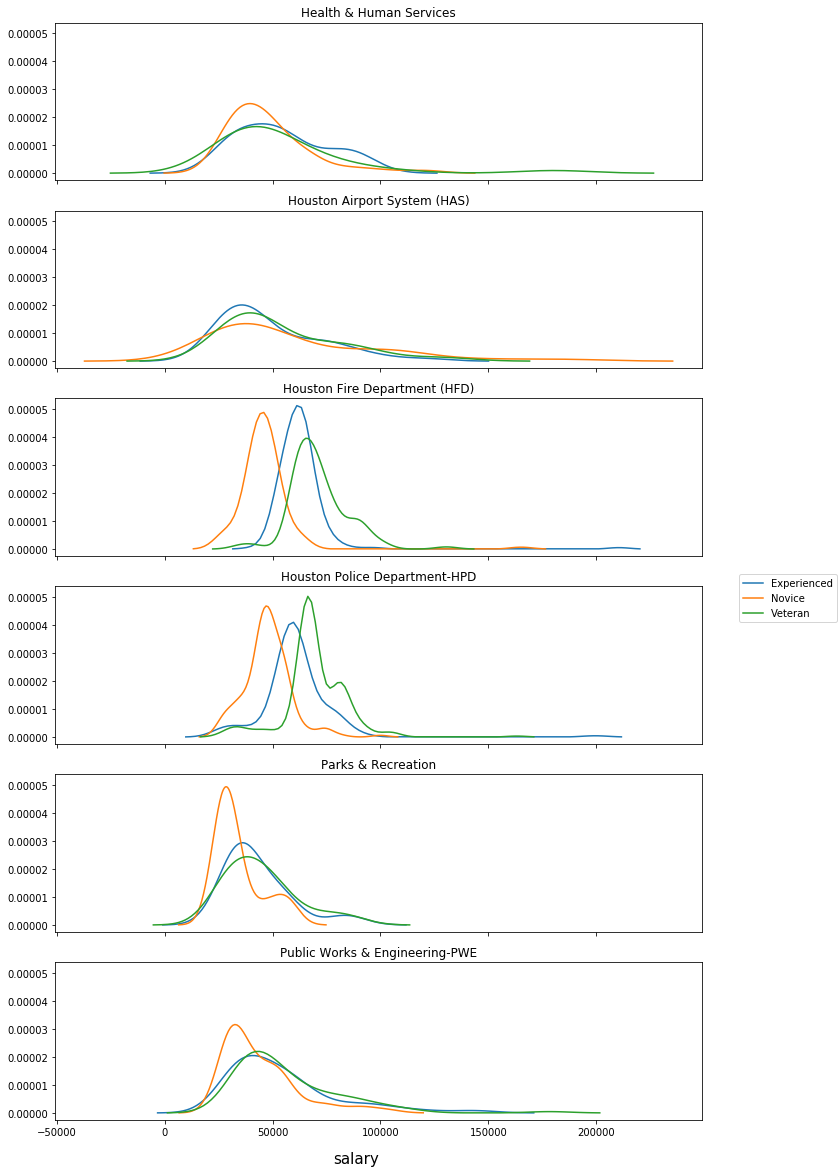

In [22]:
dxp.aggplot(agg='salary', data=emp, groupby='experience_level', kind='kde', orient='v', row='dept')

## Use the `wrap` parameter to make new rows/columns
Set the `wrap` parameter to an integer to determine where a new row/column will be formed.

(<Figure size 864x720 with 6 Axes>,)

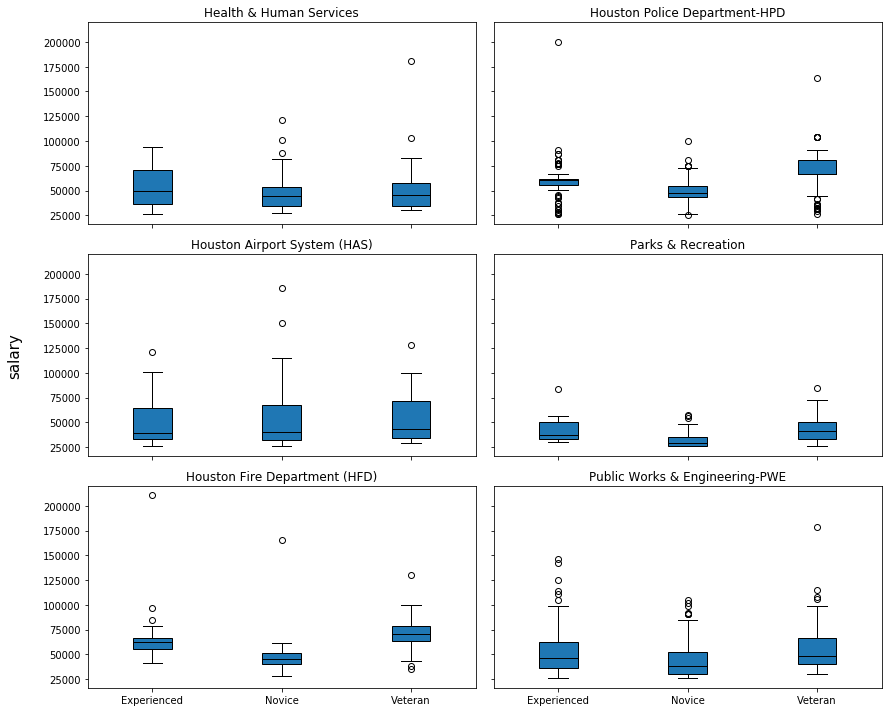

In [23]:
dxp.aggplot(agg='salary', data=emp, groupby='experience_level', kind='box', orient='v', row='dept', wrap=3)

## `wrap` works for both `row` or `col`

(<Figure size 1296x576 with 6 Axes>,)

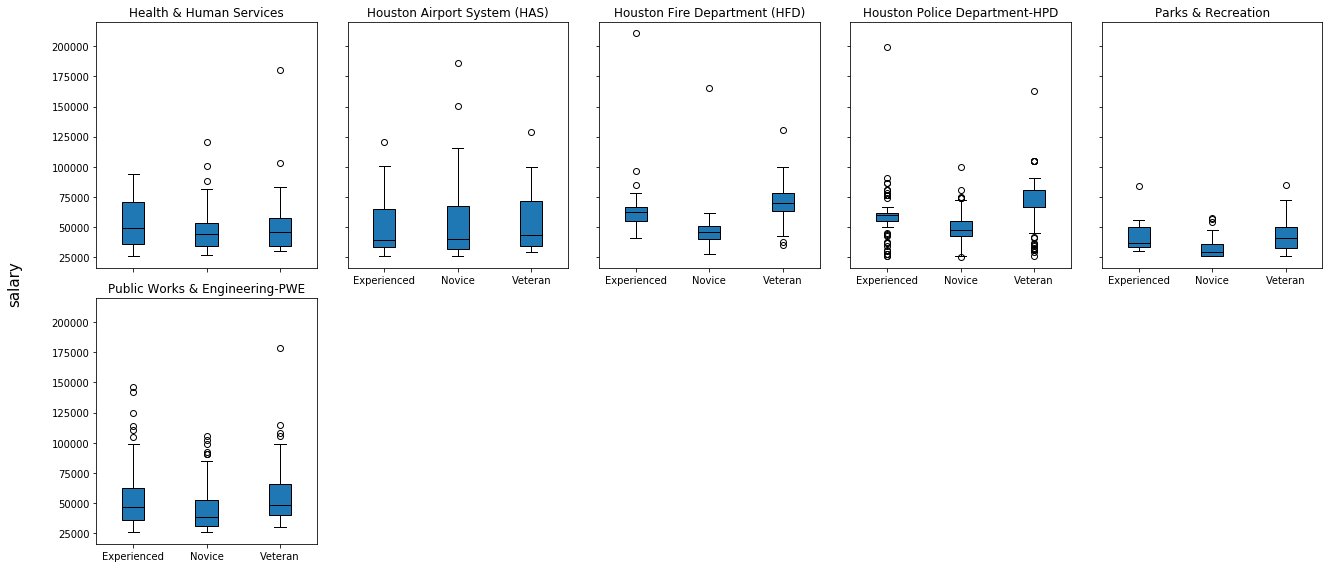

In [24]:
dxp.aggplot(agg='salary', data=emp, groupby='experience_level', kind='box', orient='v', col='dept', wrap=5)

# Use both `row` and `col` for a entire grid
By using both `row` and `col`, you can maximize the number of variables you divide the data into.

(<Figure size 1008x1152 with 18 Axes>,)

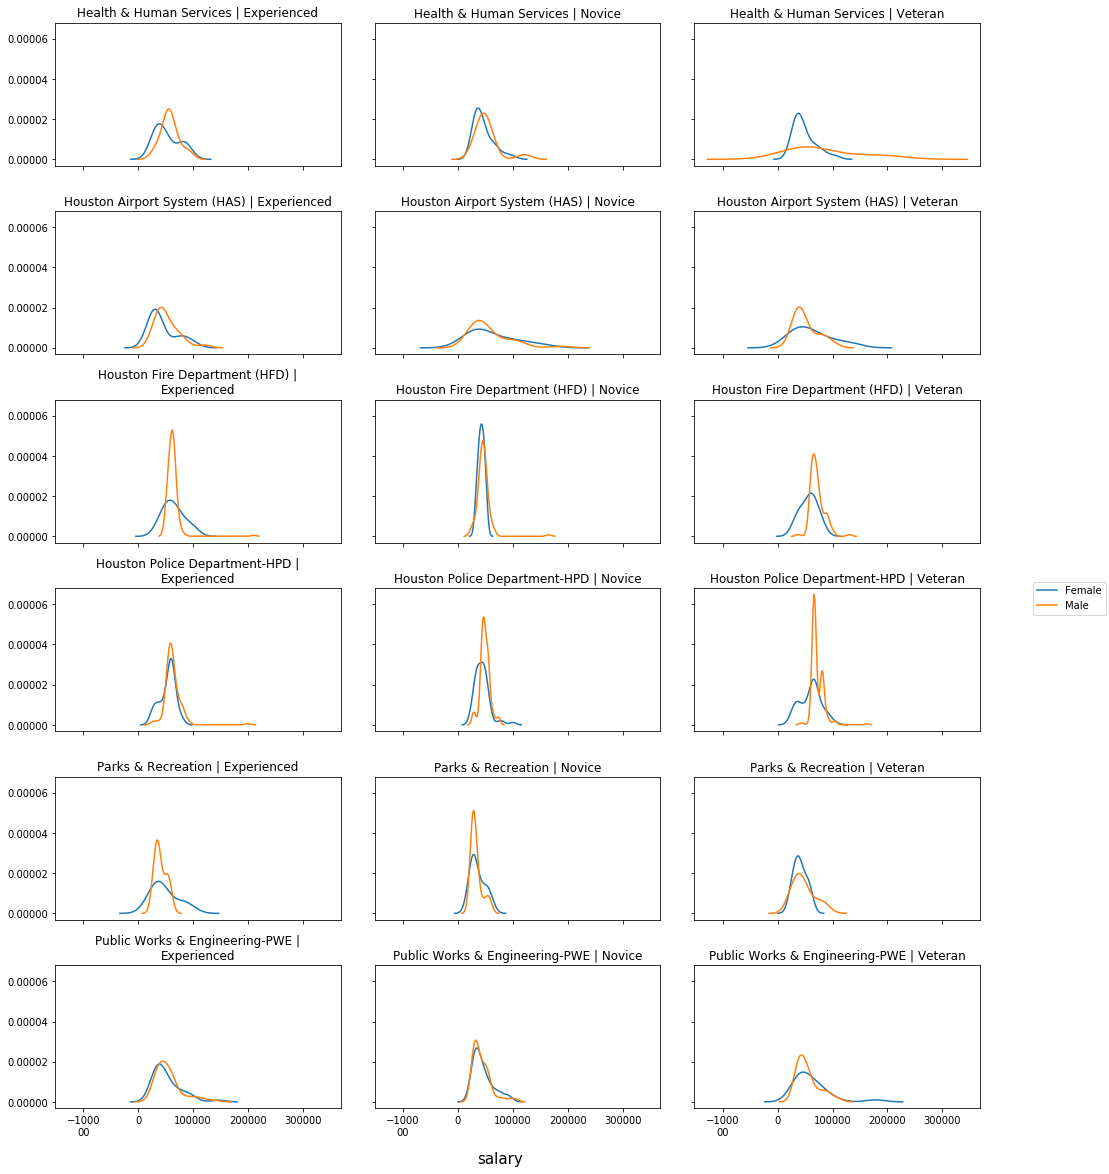

In [25]:
dxp.aggplot(agg='salary', data=emp, groupby='gender', kind='kde', row='dept', col='experience_level')

# Normalize by more than one variable

Before, we normalized by just a single variable. It is possible to normalize by multiple variables with a tuple. Here we normalize by department and gender. Adding up all the blue bars for each department should add to 1.

(<Figure size 720x1008 with 5 Axes>,)

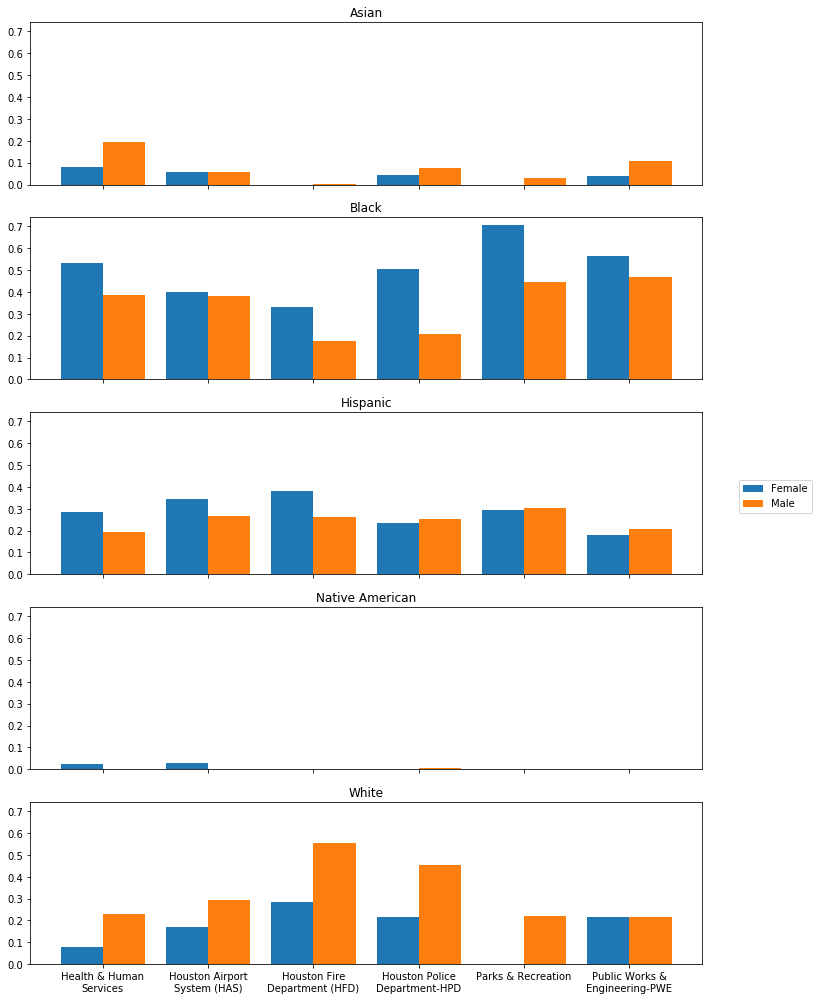

In [26]:
dxp.aggplot(agg='dept', data=emp, hue='gender', kind='bar', row='race', normalize=('dept', 'gender'))

## Normalize by three variables
Here we normalize by race, experience level, and gender. Each set of orange/blue bars within each plot will add to 1.

(<Figure size 1008x1008 with 15 Axes>,)

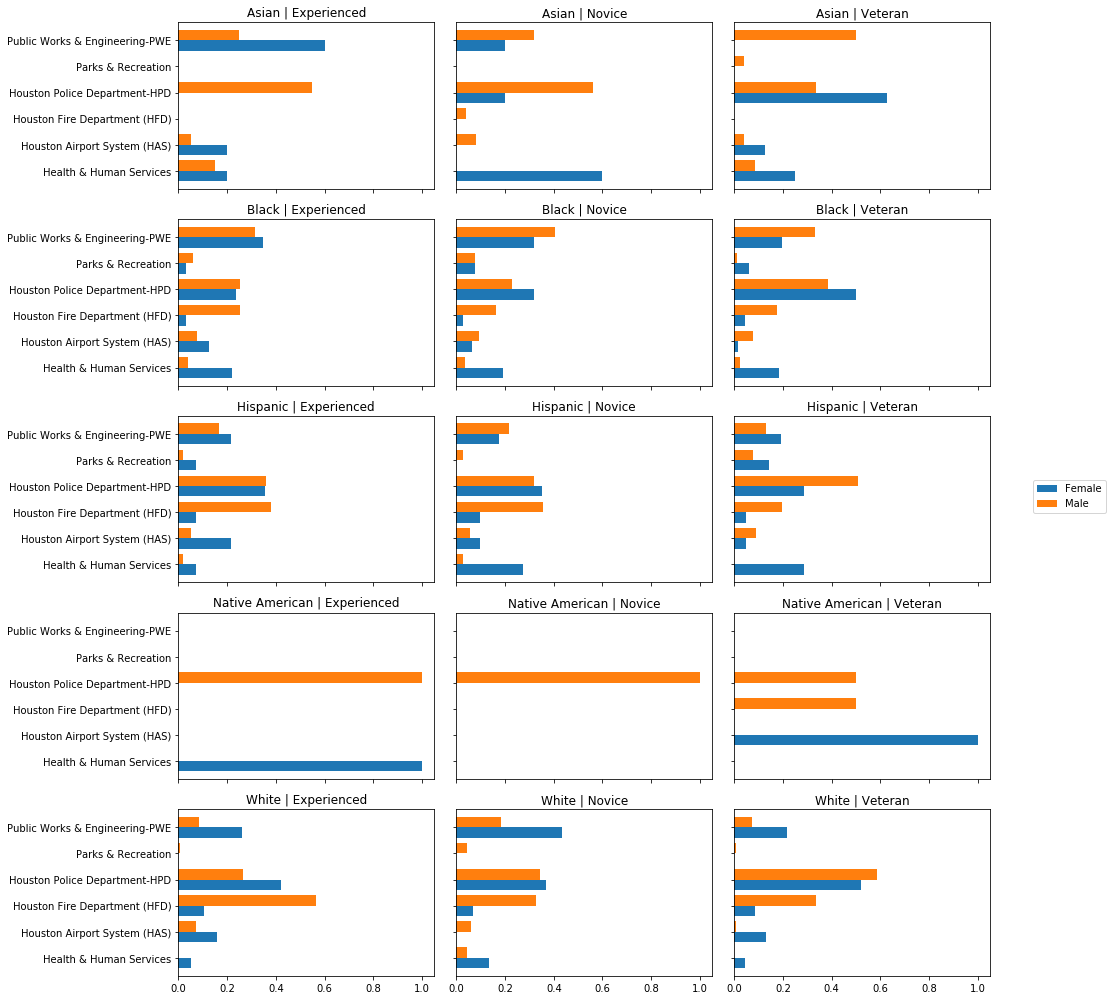

In [27]:
dxp.aggplot(agg='dept', data=emp, hue='gender', kind='bar', row='race', 
            col='experience_level', normalize=('gender', 'experience_level', 'race'), orient='h')

# Joint Plots
`joinplot` works differently than `aggplot` in that no aggregation takes place. It plots the raw values between two variables. It can split the data into groups or new plots with `hue`, `row`, and `col`. The default plot is a scatter plot, but you can also provide a string value to the `kind` parameter to make line, kde, or bar plots. 

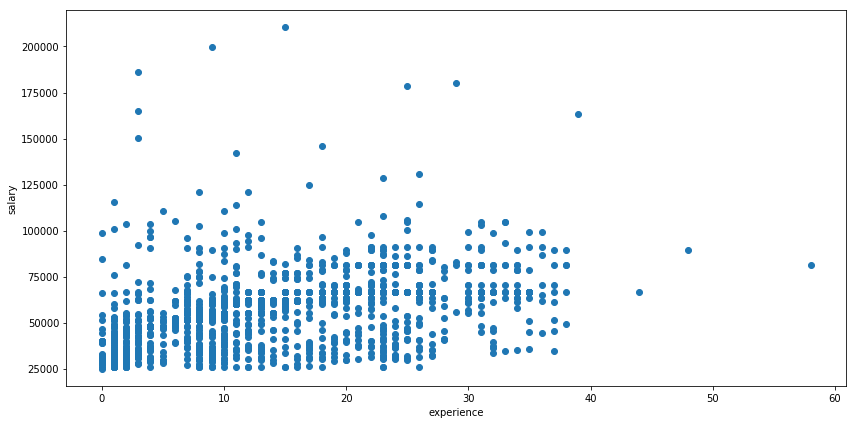

In [28]:
dxp.jointplot('experience', 'salary', data=emp)

## Split data in the same plot with `hue`

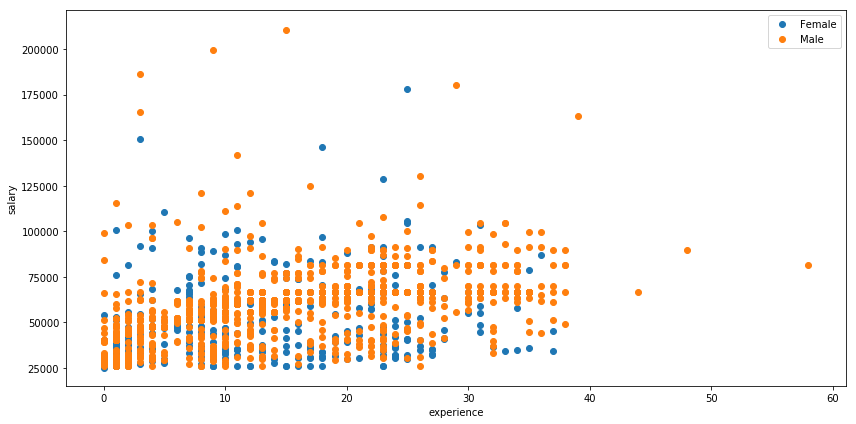

In [29]:
dxp.jointplot('experience', 'salary', data=emp, hue='gender')

## Plot a regression line by setting `fit_reg` equal to `True`
By default it plots the 95% confidence interval around the mean.

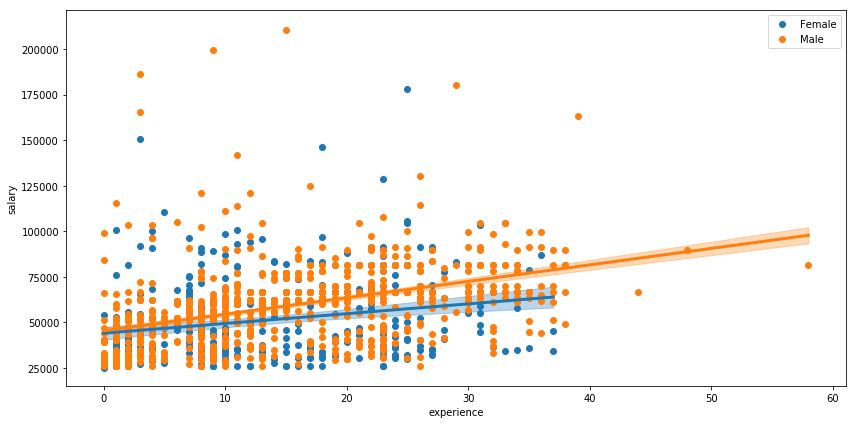

In [30]:
dxp.jointplot('experience', 'salary', data=emp, hue='gender', fit_reg=True)

## Further split the data into separate plots with `row` and `col`

(<Figure size 864x720 with 6 Axes>,)

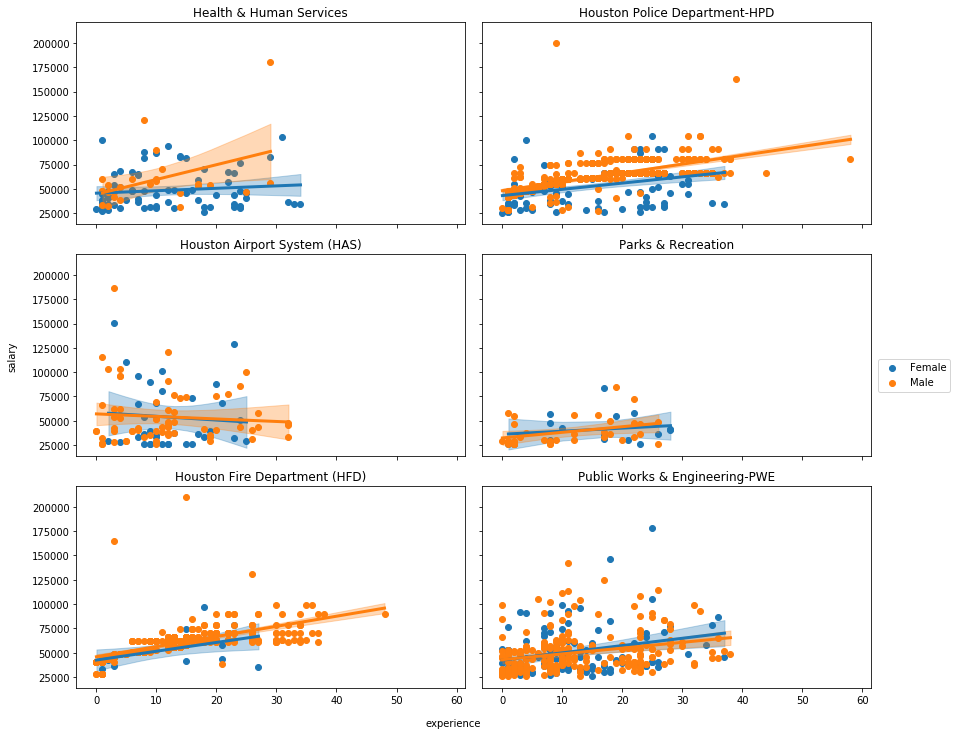

In [31]:
dxp.jointplot('experience', 'salary', data=emp, hue='gender', row='dept', wrap=3, fit_reg=True)

(<Figure size 1008x1152 with 18 Axes>,)

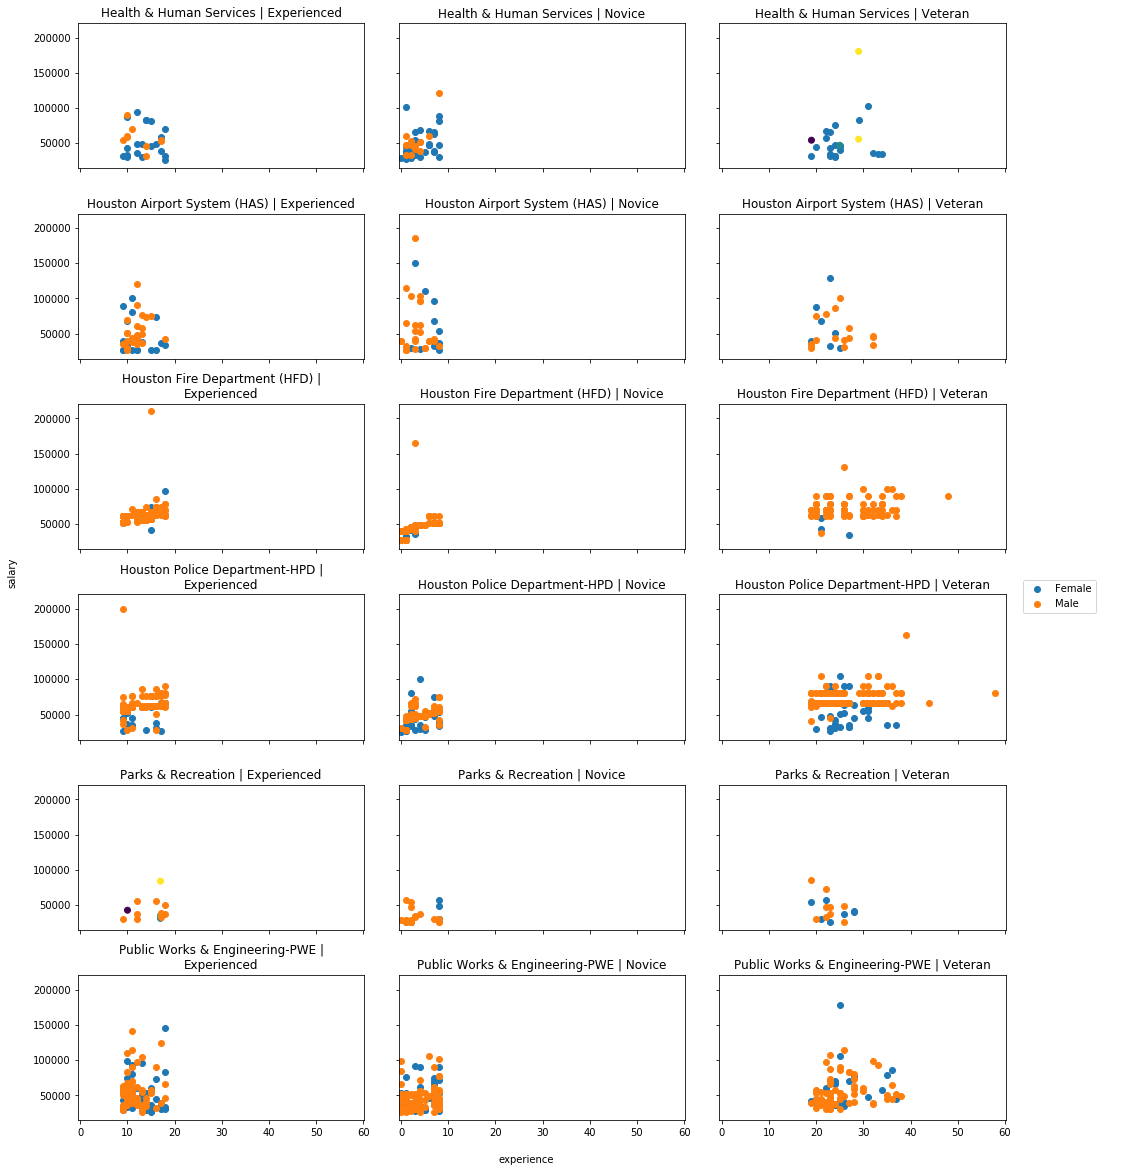

In [32]:
dxp.jointplot('experience', 'salary', data=emp, hue='gender', row='dept', col='experience_level')

## Use the `s` parameter to change the size of each marker
Let `s` equal a column name containing numeric values to set each marker size individually. We need to create another numeric variable first since the dataset only contains two.

In [33]:
import numpy as np
emp['num'] = np.random.randint(10, 300, len(emp))

(<Figure size 864x720 with 6 Axes>,)

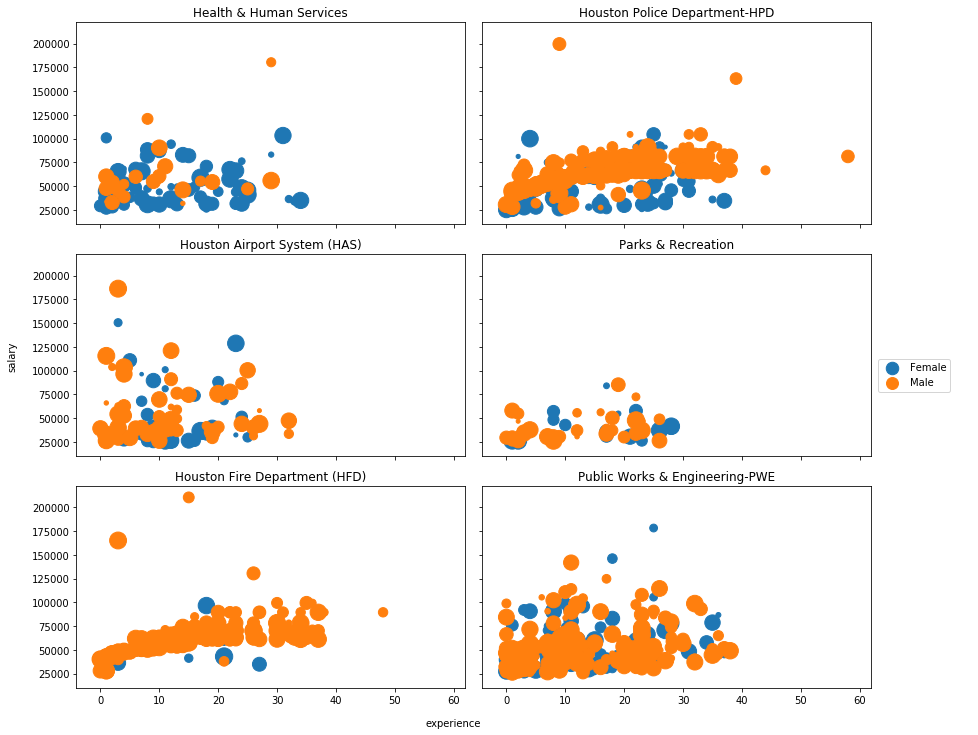

In [34]:
dxp.jointplot('experience', 'salary', data=emp, hue='gender', row='dept', wrap=3, s='num')

# Line Plots

In [35]:
df_stocks = pd.read_csv('notebooks/data/stocks.csv', parse_dates=['date'])
df_stocks.head()

,date,close,symbol,percent_gain,year,month
0,2013-10-07,63.7997,aapl,0.0,2013,10
1,2013-10-07,96.6579,cvx,0.0,2013,10
2,2013-10-07,35.0541,txn,0.0,2013,10
3,2013-10-07,19.4912,csco,0.0,2013,10
4,2013-10-07,310.0300,amzn,0.0,2013,10


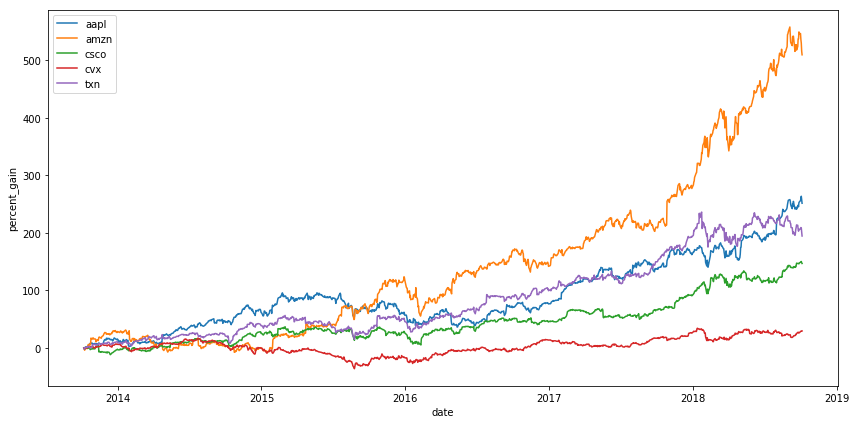

In [36]:
dxp.jointplot(x='date', y='percent_gain', data=df_stocks, hue='symbol', kind='line')

(<Figure size 864x720 with 6 Axes>,)

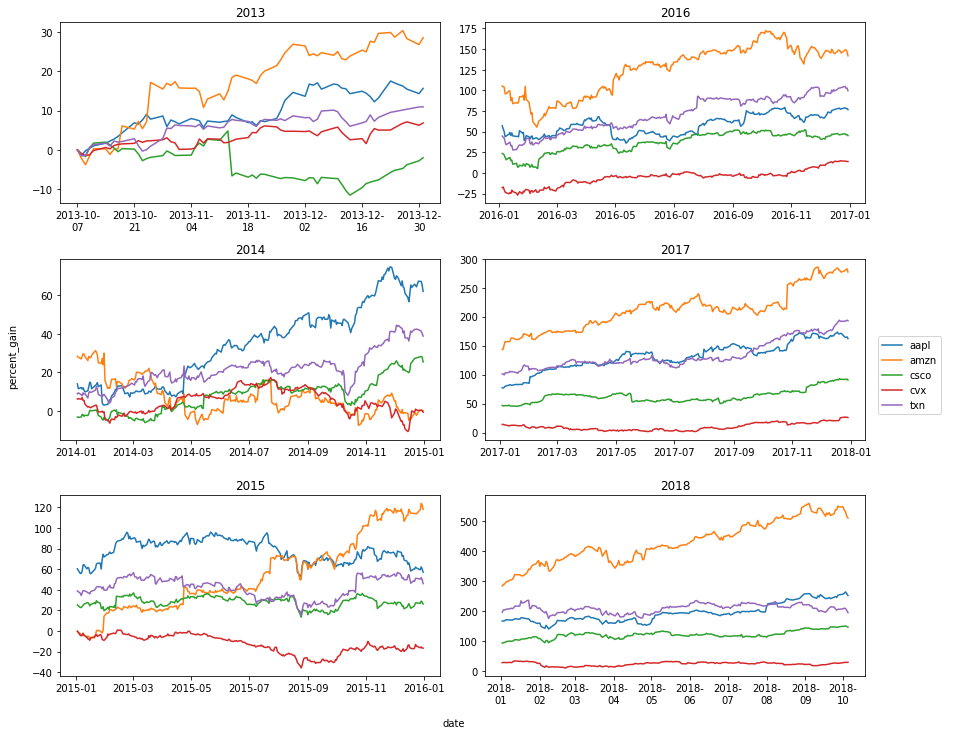

In [37]:
dxp.jointplot(x='date', y='percent_gain', data=df_stocks, kind='line', hue='symbol', row='year', wrap=3,
             sharex=False, sharey=False)

# 2D KDE Plots

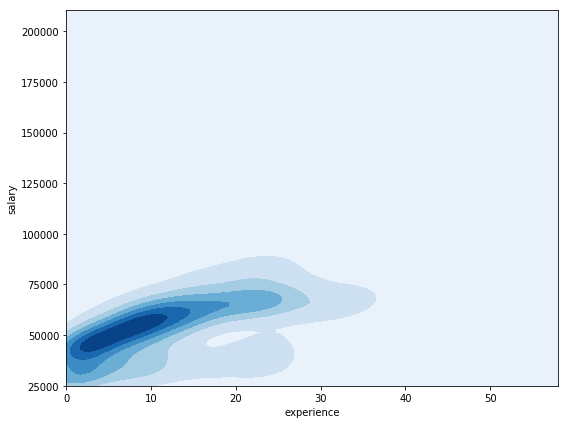

In [38]:
dxp.jointplot('experience', 'salary', data=emp, kind='kde')

(<Figure size 864x1152 with 12 Axes>,)

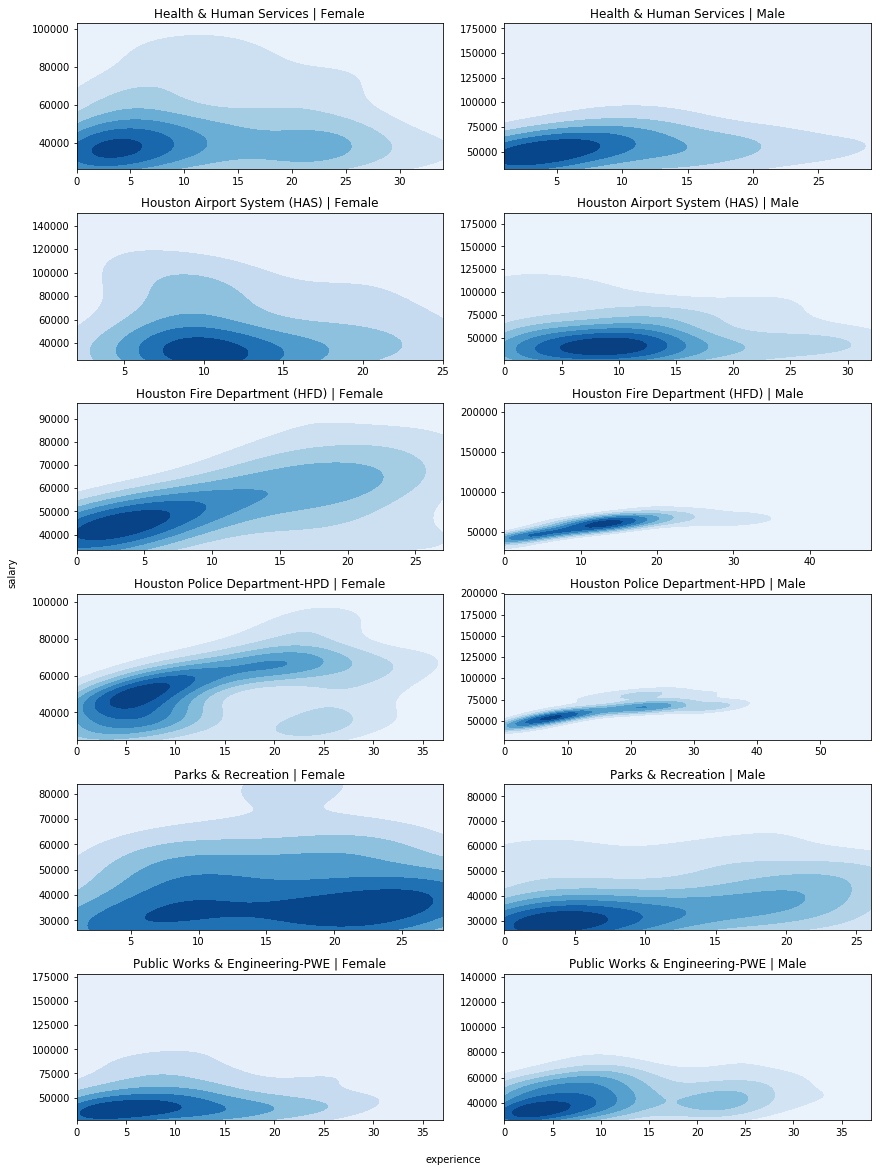

In [39]:
dxp.jointplot('experience', 'salary', data=emp, kind='kde', row='dept', col='gender', sharex=False, sharey=False)

# Bar Plots for aggregated data

If your data is already aggregated, you can use `jointplot` to plot it.

In [40]:
df = emp.groupby('dept').agg({'salary':'mean'}).reset_index()
df

,dept,salary
0,Health & Human Services,51324.980583
1,Houston Airport System (HAS),53990.368932
2,Houston Fire Department (HFD),59960.441096
3,Houston Police Department-HPD,60428.745614
4,Parks & Recreation,39426.150943
5,Public Works & Engineering-PWE,50207.806452


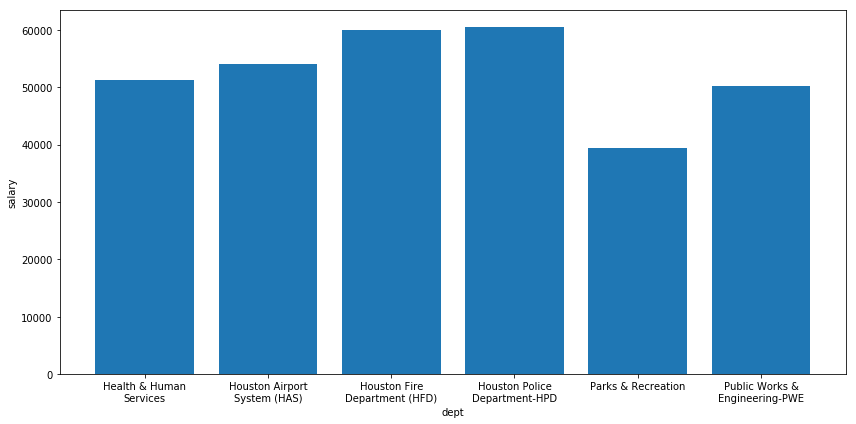

In [41]:
dxp.jointplot('dept', 'salary', data=df, kind='bar')

# Heatmaps

Heatmaps work with both tidy and aggregated data. 

## Frequency
When working with tidy data, passing it just `x` and `y` will plot the frequency of occurrences for all of the combinations of their unique values. Place the count as text in the box with `annot`. The default formatting has two decimals.

(<Figure size 720x576 with 2 Axes>,)

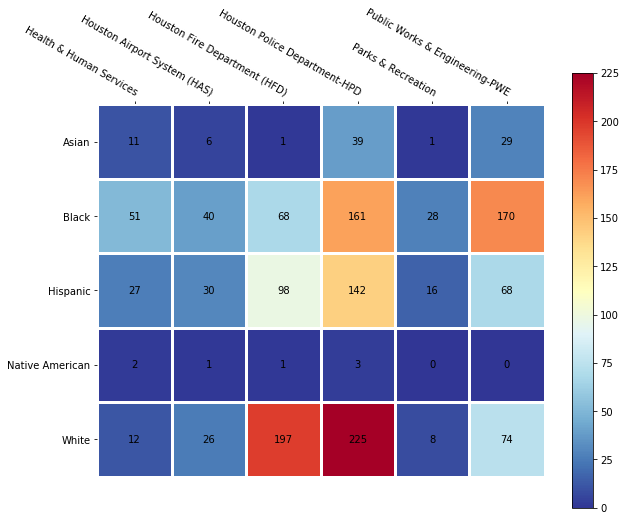

In [42]:
dxp.heatmap(x='dept', y='race', data=emp, annot=True, fmt='.0f')

## Aggregating a variable with heatmaps
Set the `agg` parameter to aggregate a particular variable. Choose how you will aggregate with the `aggfunc` parameter, which takes any string that Pandas can. The default it the mean.

(<Figure size 720x576 with 2 Axes>,)

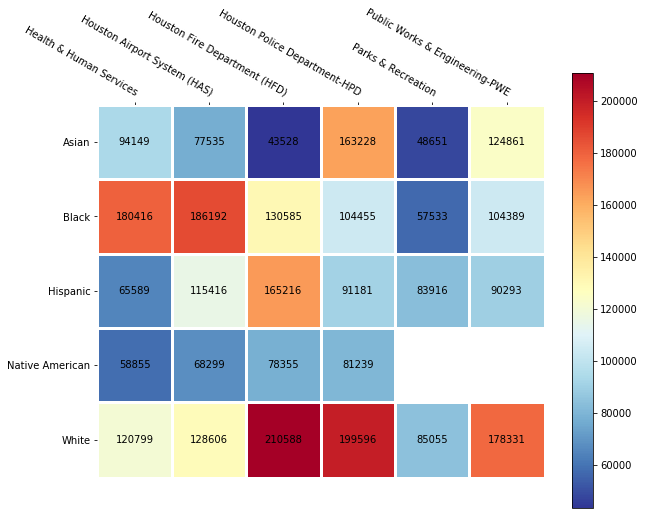

In [43]:
dxp.heatmap(x='dept', y='race', agg='salary', aggfunc='max', data=emp, annot=True, fmt='.0f')

## Normalize heatmaps by row, column, or all data
You can normalize the data by row, column, or all data with. Use the string name of the column for row and column normalization. Below we find the total percentage of all combined years of experience normalized by race. For example, of all the total years of experience for White employees, 89% of those years are male.

(<Figure size 720x576 with 2 Axes>,)

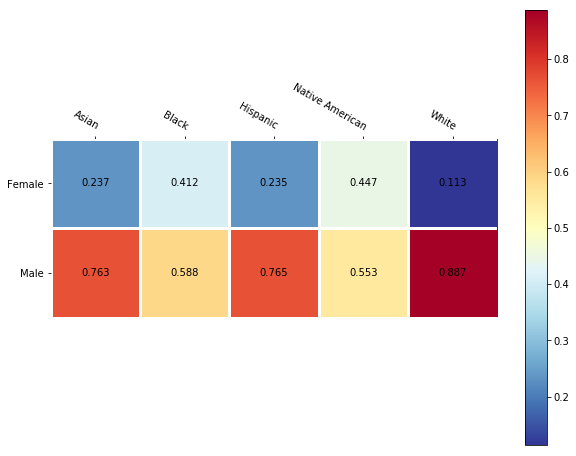

In [44]:
dxp.heatmap(x='race', y='gender', agg='experience', aggfunc='sum', 
            data=emp, annot=True, fmt='.3f', normalize='race')

(<Figure size 720x576 with 2 Axes>,)

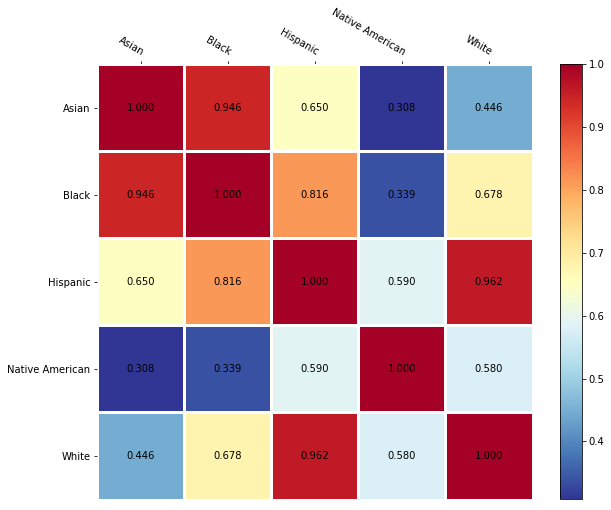

In [45]:
dxp.heatmap(x='race', y='dept', agg='experience', aggfunc='sum', 
            data=emp, annot=True, fmt='.3f', normalize='race', corr=True)

## Heatmaps without aggregating data
If you pass just the DataFrame into `heatmap` then those raw values will be used to create the colors. Here we plot some random numbers from a normal distribution.

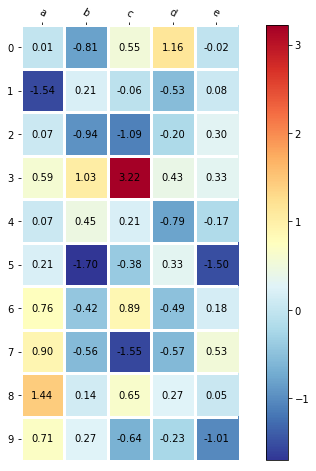

In [46]:
df = pd.DataFrame(np.random.randn(10, 5), columns=list('abcde'))
fig, = dxp.heatmap(data=df, annot=True)

## Find correlations by setting `corr` equal to `True`

Setting the `corr` parameter to True computes the pairwise correlation matrix between the columns. Any string columns are discarded. Below, we use the popular Kaggle housing dataset.

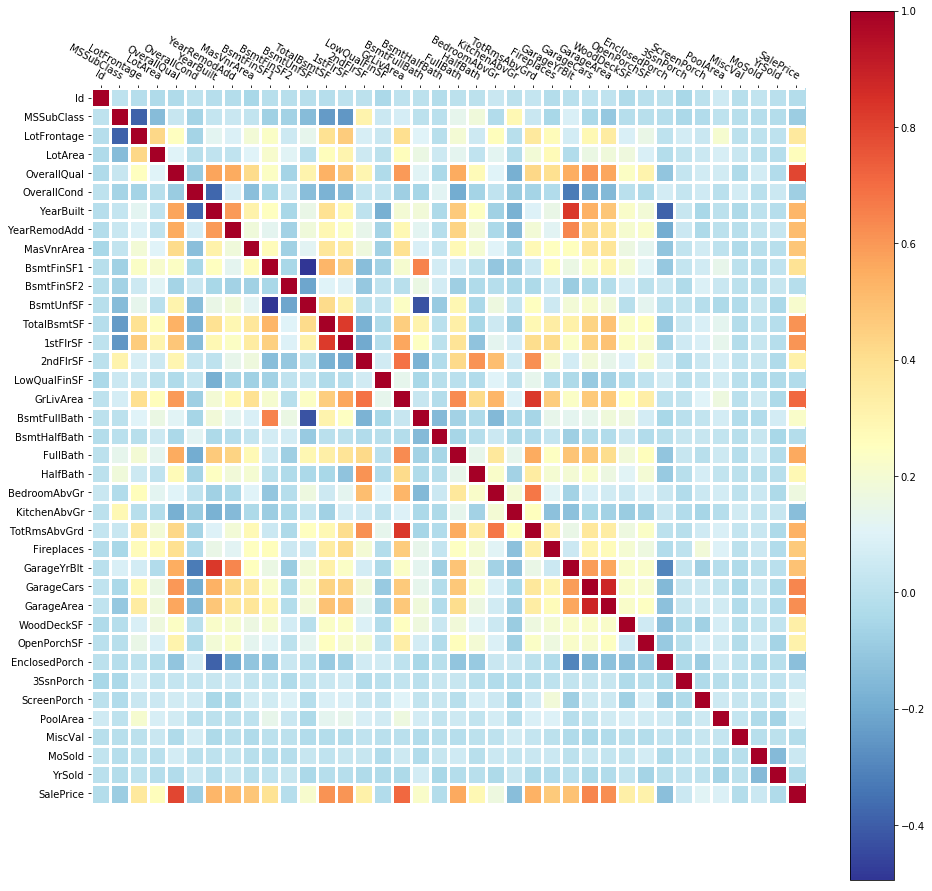

In [47]:
housing = pd.read_csv('notebooks/data/housing.csv')
fig, = dxp.heatmap(data=housing, corr=True, figsize=(16, 16))

# Comparison with Seaborn
If you have used the Seaborn library, then you should notice a lot of similarities. Much of Dexplot was inspired by Seaborn. Below is a list of the extra features in Dexplot not found in Seaborn

* The ability to graph relative frequency percentage and normalize over any number of variables
* Far fewer public functions. Only two at the moment
* No need for multiple functions to do the same thing. Seaborn has both `countplot` and `barplot`
* Ability to make grids with a single function instead of having to use a higher level function like `catplot`
* Pandas `groupby` methods are available as strings
* Both x/y-labels and titles are automatically wrapped so that they don't overlap
* The figure size (plus several other options) and available to change without dipping down into matplotlib
* No new types like FacetGrid. Only matplotlib objects are returned